In [19]:
from omigo_core import tsv
from omigo_ext import graphviz_ext

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.container { height:200% !important; }</style>"))

In [23]:
# create some list of vertices
vtsv = tsv.TSV("\t".join(["name", "type"]), []) \
    .add_map_as_row({"name": "Chris Evans", "type": "actor"}) \
    .add_map_as_row({"name": "Robert Downy", "type": "actor"}) \
    .add_map_as_row({"name": "Sabastian Stan", "type": "actor"}) \
    .add_map_as_row({"name": "Scarlett Johansson", "type": "actor"}) \
    .add_map_as_row({"name": "Tom Holland", "type": "actor"}) \
    .add_map_as_row({"name": "Captain America", "type": "movie"}) \
    .add_map_as_row({"name": "Civil War", "type": "movie"}) \
    .add_map_as_row({"name": "Winter Soldier", "type": "movie"}) \
    .add_map_as_row({"name": "Avengers", "type": "movie"}) \
    .add_map_as_row({"name": "Black Widow", "type": "movie"}) \
    .add_map_as_row({"name": "Spiderman", "type": "movie"}) \
    .add_map_as_row({"name": "Infinity War", "type": "movie"}) \

#    .add_map_as_row({"name": "Endgame", "type": "movie"})

# create some edges
etsv = tsv.TSV("\t".join(["x1", "x2", "type"]), []) \
    .add_map_as_row({"x1": "Chris Evans", "x2": "Captain America", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Chris Evans", "x2": "Civil War", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Chris Evans", "x2": "Avengers", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Chris Evans", "x2": "Infinity War", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Chris Evans", "x2": "Endgame", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Robert Downy", "x2": "Avengers", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Robert Downy", "x2": "Infinity War", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Robert Downy", "x2": "Spiderman", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Robert Downy", "x2": "Winter Soldier", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Robert Downy", "x2": "Endgame", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Scarlett Johansson", "x2": "Captain America", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Scarlett Johansson", "x2": "Black Widow", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Scarlett Johansson", "x2": "Avengers", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Scarlett Johansson", "x2": "Infinity War", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Scarlett Johansson", "x2": "Endgame", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Tom Holland", "x2": "Spiderman", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Tom Holland", "x2": "Avengers", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Tom Holland", "x2": "Civil War", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Tom Holland", "x2": "Infinity War", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Tom Holland", "x2": "Endgame", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Sabastian Stan", "x2": "Captain America", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Sabastian Stan", "x2": "Winter Soldier", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Sabastian Stan", "x2": "Civil War", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Sabastian Stan", "x2": "Infinity War", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Sabastian Stan", "x2": "Endgame", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Captain America", "x2": "Winter Soldier", "type": "sequel"}) \
    .add_map_as_row({"x1": "Winter Soldier", "x2": "Civil War", "type": "sequel"}) \
    .add_map_as_row({"x1": "Avengers", "x2": "Infinity War", "type": "sequel"}) \
    .add_map_as_row({"x1": "Infinity War", "x2": "Endgame", "type": "sequel"}) \
    .add_map_as_row({"x1": "Chris Evans", "x2": "Sabastian Stan", "type": "friends"}) \
    .add_map_as_row({"x1": "Chris Evans", "x2": "Scarlett Johansson", "type": "dated"})




[WARN]: There are edge ids that dont have vertex information: {'Endgame'}


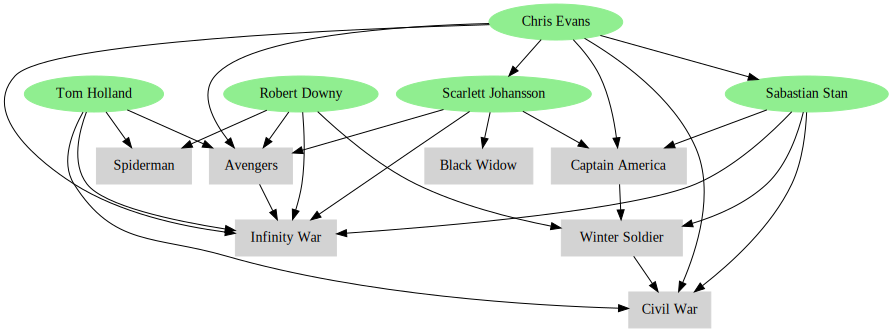

In [24]:
# define custom function to control the style
def custom_display_func(mp):
    props = graphviz_ext.__dot_func_default__(mp)
    if (mp["type"] == "actor"):
        props["shape"] = "oval"
        props["color"] = "lightgreen"
    else:
        props["shape"] = "rectangle"
        props["color"] = "lightgrey"        
    return props    

graphviz_ext.plot_graph(vtsv, etsv, "name", "x1", "x2", vertex_display_id_col = "name", node_props = [], edge_props = [], 
    custom_display_func = custom_display_func, create_missing_vertices = False)